# Conseção de crédito

Esse projeto tem como intúito verificar se a instituição financeira, com base no seu histórico de inadimplência de clientes, deve conceder ou não linha de crédito a um cliente.

Base de dados: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

## Preparação de dados

### Extração

In [1]:
data_url = 'https://archive.ics.uci.edu/static/public/144/statlog+german+credit+data.zip';
archive = 'statlog+german+credit+data.zip'

In [2]:
import requests

In [3]:
def download_file(url, filename):
  response = requests.get(url)

  with open(filename, 'wb') as file:
    file.write(response.content)

In [4]:
download_file(data_url, archive)

In [5]:
import zipfile

In [6]:
def unzip_file(filename):
  with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
unzip_file(archive)

In [8]:
import pandas as pd

In [9]:
file_path = 'german.data'

In [10]:
columns = [
  'checking_account_status',
  'duration_months',
  'credit_history',
  'purpose',
  'credit_amount',
  'savings_account_bonds',
  'employment_duration',
  'installment_rate_percentage',
  'personal_status_sex',
  'other_debtors_guarantors',
  'residence_since',
  'property',
  'age',
  'other_installment_plans',
  'housing',
  'existing_credits_count',
  'job',
  'dependents_count',
  'telephone',
  'foreign_worker',
  'defaulter'
]

In [11]:
df = pd.read_csv(file_path, delimiter=' ', names=columns)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   checking_account_status      1000 non-null   object
 1   duration_months              1000 non-null   int64 
 2   credit_history               1000 non-null   object
 3   purpose                      1000 non-null   object
 4   credit_amount                1000 non-null   int64 
 5   savings_account_bonds        1000 non-null   object
 6   employment_duration          1000 non-null   object
 7   installment_rate_percentage  1000 non-null   int64 
 8   personal_status_sex          1000 non-null   object
 9   other_debtors_guarantors     1000 non-null   object
 10  residence_since              1000 non-null   int64 
 11  property                     1000 non-null   object
 12  age                          1000 non-null   int64 
 13  other_installment_plans      1000 

In [13]:
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account_bonds,employment_duration,installment_rate_percentage,personal_status_sex,other_debtors_guarantors,...,property,age,other_installment_plans,housing,existing_credits_count,job,dependents_count,telephone,foreign_worker,defaulter
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### Transformação

In [14]:
categorical_columns = [
  'checking_account_status',
  'credit_history',
  'purpose',
  'savings_account_bonds',
  'employment_duration',
  'personal_status_sex',
  'other_debtors_guarantors',
  'property',
  'other_installment_plans',
  'housing',
  'job',
  'telephone',
  'foreign_worker'
]

In [15]:
labels = {
  'A11': '< 0 DM',
  'A12': '>= 0 and < 200 DM',
  'A13': '>= 200 DM / salary assignments for at least 1 year',
  'A14': 'no checking account',
  'A30': 'no credits taken / all credits paid back duly',
  'A31': 'all credits at this bank paid back duly',
  'A32': 'existing credits paid back duly till now',
  'A33': 'delay in paying off in the past',
  'A34': 'critical account / other credits existing (not at this bank)',
  'A40': 'car (new)',
  'A41': 'car (used)',
  'A42': 'furniture / equipment',
  'A43': 'radio / television',
  'A44': 'domestic appliances',
  'A45': 'repairs',
  'A46': 'education',
  'A47': 'vacation',
  'A48': 'retraining',
  'A49': 'business',
  'A410': 'others',
  'A61': '< 100 DM',
  'A62': '>= 100 DM and < 500 DM',
  'A63': '>= 500 DM and < 1000 DM',
  'A64': '>= 1000 DM',
  'A65': 'unknown / no savings account',
  'A71': 'unemployed',
  'A72': '< 1 year',
  'A73': '>= 1 year and < 4 years',
  'A74': '>= 4 years and < 7 years',
  'A75': '>= 7 years',
  'A91': 'male divorced / separated',
  'A92': 'female divorced / separated / married',
  'A93': 'male single',
  'A94': 'male married / widowed',
  'A95': 'female single',
  'A101': 'none',
  'A102': 'co-applicant',
  'A103': 'guarantor',
  'A121': 'real estate',
  'A122': 'building society savings agreement / life insurance',
  'A123': 'car or other',
  'A124': 'unknown / no property',
  'A141': 'bank',
  'A142': 'stores',
  'A143': 'none',
  'A151': 'rent',
  'A152': 'own',
  'A153': 'for free',
  'A171': 'unemployed / unskilled - non-resident',
  'A172': 'unskilled - resident',
  'A173': 'skilled employee / official',
  'A174': 'management / self-employed / highly qualified employee / officer',
  'A191': 'none',
  'A192': 'yes, registered under the customers name',
  'A201': 'yes',
  'A202': 'no'
}

In [16]:
df = df.apply(lambda col: col.map(labels) if col.name in categorical_columns else col)

In [17]:
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account_bonds,employment_duration,installment_rate_percentage,personal_status_sex,other_debtors_guarantors,...,property,age,other_installment_plans,housing,existing_credits_count,job,dependents_count,telephone,foreign_worker,defaulter
0,< 0 DM,6,critical account / other credits existing (not...,radio / television,1169,unknown / no savings account,>= 7 years,4,male single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,>= 0 and < 200 DM,48,existing credits paid back duly till now,radio / television,5951,< 100 DM,>= 1 year and < 4 years,2,female divorced / separated / married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account / other credits existing (not...,education,2096,< 100 DM,>= 4 years and < 7 years,2,male single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture / equipment,7882,< 100 DM,>= 4 years and < 7 years,2,male single,guarantor,...,building society savings agreement / life insu...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,>= 1 year and < 4 years,3,male single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


In [18]:
codes = list(labels.keys())

In [19]:
print(codes)

['A11', 'A12', 'A13', 'A14', 'A30', 'A31', 'A32', 'A33', 'A34', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A410', 'A61', 'A62', 'A63', 'A64', 'A65', 'A71', 'A72', 'A73', 'A74', 'A75', 'A91', 'A92', 'A93', 'A94', 'A95', 'A101', 'A102', 'A103', 'A121', 'A122', 'A123', 'A124', 'A141', 'A142', 'A143', 'A151', 'A152', 'A153', 'A171', 'A172', 'A173', 'A174', 'A191', 'A192', 'A201', 'A202']


In [20]:
df.isin(codes).any()

checking_account_status        False
duration_months                False
credit_history                 False
purpose                        False
credit_amount                  False
savings_account_bonds          False
employment_duration            False
installment_rate_percentage    False
personal_status_sex            False
other_debtors_guarantors       False
residence_since                False
property                       False
age                            False
other_installment_plans        False
housing                        False
existing_credits_count         False
job                            False
dependents_count               False
telephone                      False
foreign_worker                 False
defaulter                      False
dtype: bool

In [21]:
df.isna().sum()

checking_account_status        0
duration_months                0
credit_history                 0
purpose                        0
credit_amount                  0
savings_account_bonds          0
employment_duration            0
installment_rate_percentage    0
personal_status_sex            0
other_debtors_guarantors       0
residence_since                0
property                       0
age                            0
other_installment_plans        0
housing                        0
existing_credits_count         0
job                            0
dependents_count               0
telephone                      0
foreign_worker                 0
defaulter                      0
dtype: int64

In [22]:
df_copy = df.copy()

In [23]:
def apply_one_hot_enconding(df, categorical_columns, withPrefix = False):
  for col in categorical_columns:
    df[col] = df[col].str.replace(' ', '_')
    dummies = pd.get_dummies(df[col], prefix=col) if withPrefix else pd.get_dummies(df[col])
    dummies = dummies.astype(int)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)

  return df

In [24]:
df = apply_one_hot_enconding(df, categorical_columns, True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                                                       Non-Null Count  Dtype
---  ------                                                                       --------------  -----
 0   duration_months                                                              1000 non-null   int64
 1   credit_amount                                                                1000 non-null   int64
 2   installment_rate_percentage                                                  1000 non-null   int64
 3   residence_since                                                              1000 non-null   int64
 4   age                                                                          1000 non-null   int64
 5   existing_credits_count                                                       1000 non-null   int64
 6   dependents_count                                         

In [26]:
df_copy = apply_one_hot_enconding(df_copy, categorical_columns, False)

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   duration_months                                                   1000 non-null   int64
 1   credit_amount                                                     1000 non-null   int64
 2   installment_rate_percentage                                       1000 non-null   int64
 3   residence_since                                                   1000 non-null   int64
 4   age                                                               1000 non-null   int64
 5   existing_credits_count                                            1000 non-null   int64
 6   dependents_count                                                  1000 non-null   int64
 7   defaulter                                           

In [28]:
# Quantas colunas deveria ter?
len(columns) + len(labels) - len(categorical_columns) - 1 # -1:  menos defaulter

63

In [29]:
labels_to_compare = list(map(lambda label: label.replace(' ', '_'), list(labels.values())))

In [30]:
column_labels = list(df_copy.columns)

In [31]:
[label for label in labels_to_compare if label not in column_labels]

['vacation', 'female_single']

In [32]:
# Nem todos os códigos foram usados pelos registros. Códigos não usados: A47 (vacation), A95 (female single)

In [33]:
df.head()

,duration_months,credit_amount,installment_rate_percentage,residence_since,age,existing_credits_count,dependents_count,defaulter,checking_account_status_<_0_DM,checking_account_status_>=_0_and_<_200_DM,...,housing_own,housing_rent,job_management_/_self-employed_/_highly_qualified_employee_/_officer,job_skilled_employee_/_official,job_unemployed_/_unskilled_-_non-resident,job_unskilled_-_resident,telephone_none,"telephone_yes,_registered_under_the_customers_name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,2,0,1,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,1,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,2,1,0,...,0,0,0,1,0,0,1,0,0,1


In [34]:
def transform_defaulter_column(df):
  defaulter = {
    1: 0,
    2: 1
  }
  return df['defaulter'].map(defaulter)

In [35]:
df['defaulter'] = transform_defaulter_column(df)

In [36]:
df.head()

,duration_months,credit_amount,installment_rate_percentage,residence_since,age,existing_credits_count,dependents_count,defaulter,checking_account_status_<_0_DM,checking_account_status_>=_0_and_<_200_DM,...,housing_own,housing_rent,job_management_/_self-employed_/_highly_qualified_employee_/_officer,job_skilled_employee_/_official,job_unemployed_/_unskilled_-_non-resident,job_unskilled_-_resident,telephone_none,"telephone_yes,_registered_under_the_customers_name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,1,1,0,...,0,0,0,1,0,0,1,0,0,1


In [37]:
X = df.drop('defaulter', axis=1)
y = df['defaulter']

In [38]:
X.head()

,duration_months,credit_amount,installment_rate_percentage,residence_since,age,existing_credits_count,dependents_count,checking_account_status_<_0_DM,checking_account_status_>=_0_and_<_200_DM,checking_account_status_>=_200_DM_/_salary_assignments_for_at_least_1_year,...,housing_own,housing_rent,job_management_/_self-employed_/_highly_qualified_employee_/_officer,job_skilled_employee_/_official,job_unemployed_/_unskilled_-_non-resident,job_unskilled_-_resident,telephone_none,"telephone_yes,_registered_under_the_customers_name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [39]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: defaulter, dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scale_X = StandardScaler()

In [42]:
X_scaled = scale_X.fit_transform(X)

In [43]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [44]:
X.head()

,duration_months,credit_amount,installment_rate_percentage,residence_since,age,existing_credits_count,dependents_count,checking_account_status_<_0_DM,checking_account_status_>=_0_and_<_200_DM,checking_account_status_>=_200_DM_/_salary_assignments_for_at_least_1_year,...,housing_own,housing_rent,job_management_/_self-employed_/_highly_qualified_employee_/_officer,job_skilled_employee_/_official,job_unemployed_/_unskilled_-_non-resident,job_unskilled_-_resident,telephone_none,"telephone_yes,_registered_under_the_customers_name",foreign_worker_no,foreign_worker_yes
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.627770,-0.606621,-0.259299,...,0.634448,-0.466933,-0.416784,0.766356,-0.149983,-0.5,-1.214598,1.214598,-0.196014,0.196014
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,-0.614337,1.648476,-0.259299,...,0.634448,-0.466933,-0.416784,0.766356,-0.149983,-0.5,0.823318,-0.823318,-0.196014,0.196014
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.614337,-0.606621,-0.259299,...,0.634448,-0.466933,-0.416784,-1.304877,-0.149983,2.0,0.823318,-0.823318,-0.196014,0.196014
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1.627770,-0.606621,-0.259299,...,-1.576173,-0.466933,-0.416784,0.766356,-0.149983,-0.5,0.823318,-0.823318,-0.196014,0.196014
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1.627770,-0.606621,-0.259299,...,-1.576173,-0.466933,-0.416784,0.766356,-0.149983,-0.5,0.823318,-0.823318,-0.196014,0.196014


In [45]:
y.value_counts()

defaulter
0    700
1    300
Name: count, dtype: int64

In [46]:
# Base desbalanceada

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
y_train.value_counts()

defaulter
0    559
1    241
Name: count, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [54]:
y_train_resample.value_counts()

defaulter
1    559
0    559
Name: count, dtype: int64

## Treinamento

Ser má pagador (inadimplente) e ser previsto como bom pagador (adimplente) é bem pior que o contrário. Nosso objetivo é reduzir os riscos de perda financeira. Queremos ao máximo evitar esse problema.

Logo, queremos **evitar falsos negativos**

Iremos dar mais importância ao **recall (revocação)** que as outras métricas.

Uma outra possíbilidade, se a financeira não se importar em errar um pouquinho a mais ao conceder crédito a pessoas inadimplentes, pode-se adotar o **F1-score**. Ele dá um bom equilíbrio entre recall e precisão.

A precisão é boa para análisar se temos muitos falsos positivos (bom pagador que é previsto como mal pagador).


### Rotinas comuns

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
def plot_roc_curve(y_test, y_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Taxa de Falsos Positivos')
  plt.ylabel('Taxa de Verdadeiros Positivos')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")
  plt.show()

In [54]:
def plot_confusion_matrix(confusion_matrix):
  plt.figure()
  sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0 - Adimplente', '1 - Inadimplente'], yticklabels=['0 - Adimplente', '1 - Inadimplente'])
  plt.xlabel('Predito')
  plt.ylabel('Real')
  plt.title('Matriz de confusão')
  plt.show()

In [61]:
def plot_prc(y_test, y_pred):
	precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
	average_precision = average_precision_score(y_test, y_pred)

	plt.figure()
	plt.plot(recall, precision, label=f'AP={average_precision:.2f}')
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	plt.title('Precision-Recall Curve')
	plt.legend(loc='best')
	plt.show()

In [64]:
def show_results(y_test, y_pred, best_params):
  print(classification_report(y_test, y_pred))
  print('\n')
  plot_roc_curve(y_test, y_pred)
  print('\n')
  plot_prc(y_test, y_pred)
  print('\n')

  if len(best_params.keys()) > 0:
    print('Melhores parâmetros:')
    print('-' * 20)
    for key, value in best_params.items():
      print(f'{key}: {value}')

  print('\n')
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm)

In [68]:
models = []

### Regresão logistica

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
def train_logistic_regression(X_train, y_train):
  model = LogisticRegression(class_weight='balanced')

  param_distributions = {
    'solver': ['newton-cg', 'lbfgs', 'newton-cholesky', 'sag', 'saga'],
    'penalty': ['l2', None],
    'max_iter': [100, 250, 500, 750, 1000]
  }

  random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    refit = 'recall',
    scoring = ['recall', 'roc_auc']
  )

  random_search.fit(X_train, y_train)
  return random_search.best_estimator_, random_search.best_params_

In [62]:
best_model, best_params = train_logistic_regression(X_train_resample, y_train_resample)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.99087e-20): result may not be accurate.
  warnings.warn(
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskyS

In [63]:
models.append({
  'name': 'Logistic Regression',
  'model': best_model,
  'params' : best_params
})

In [64]:
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       141
           1       0.56      0.75      0.64        59

    accuracy                           0.76       200
   macro avg       0.72      0.75      0.73       200
weighted avg       0.78      0.76      0.76       200





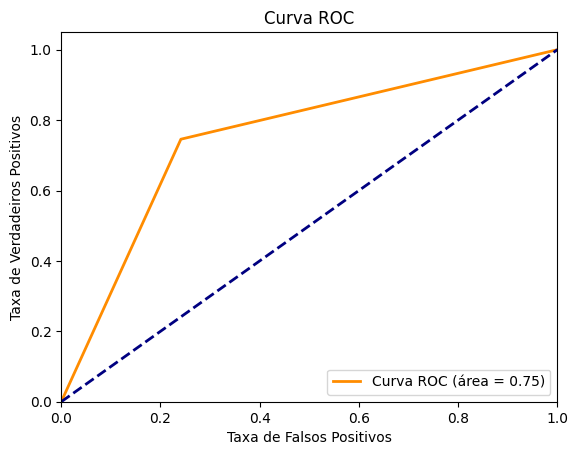



Melhores parâmetros:
--------------------
solver: newton-cg
penalty: None
max_iter: 100




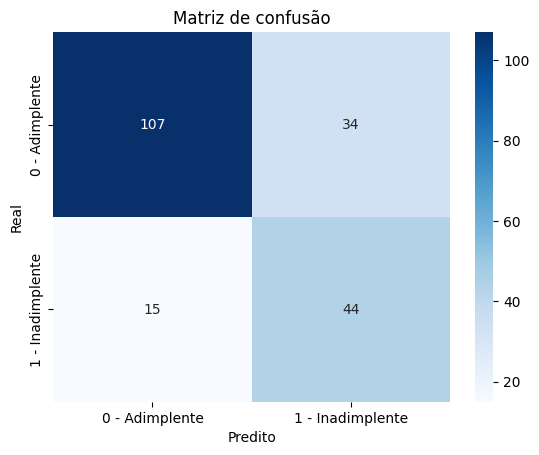

In [65]:
show_results(y_test, y_pred, best_params)

### K Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
def train_k_nearest_neighbors(X_train, y_train):
  model = KNeighborsClassifier()

  param_distributions = {
    'n_neighbors': [2, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
  }

  random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    refit = 'recall',
    scoring = ['recall', 'roc_auc']
  )

  random_search.fit(X_train, y_train)
  return random_search.best_estimator_, random_search.best_params_

In [68]:
best_model, best_params = train_k_nearest_neighbors(X_train_resample, y_train_resample)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [69]:
models.append({
  'name': 'K Nearest Neighbors',
  'model': best_model,
  'params' : best_params
})

In [70]:
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       141
           1       0.47      0.59      0.53        59

    accuracy                           0.69       200
   macro avg       0.64      0.66      0.65       200
weighted avg       0.71      0.69      0.69       200





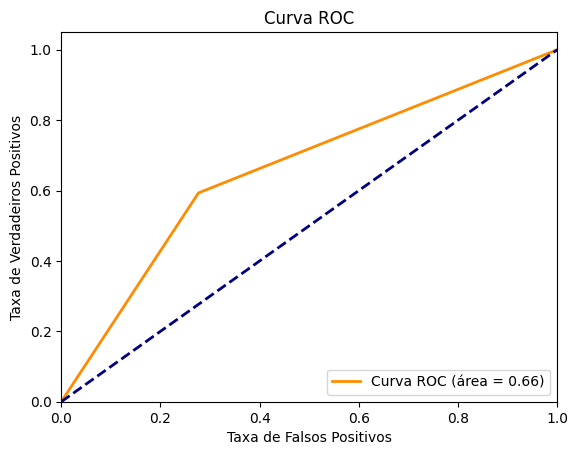



Melhores parâmetros:
--------------------
weights: distance
p: 2
n_neighbors: 2
algorithm: ball_tree




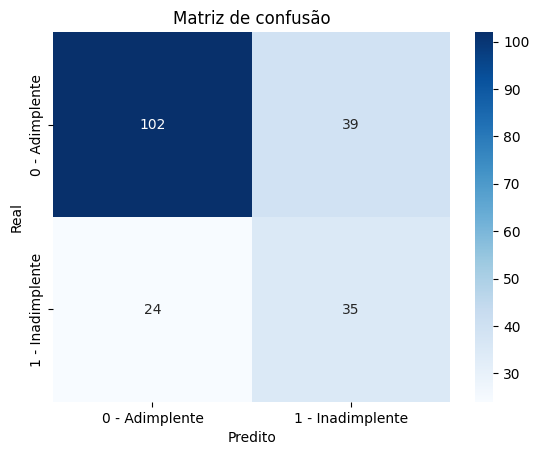

In [71]:
show_results(y_test, y_pred, best_params)

### Support Vector Machine

In [72]:
from sklearn.svm import SVC

In [73]:
def train_support_vector_machine(X_train, y_train):
  model = SVC(class_weight = 'balanced')

  param_distributions = {
    'C': [0.001, 0.01, 0.05, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
  }

  random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    refit = 'recall',
    scoring = ['recall', 'roc_auc']
  )

  random_search.fit(X_train, y_train)
  return random_search.best_estimator_, random_search.best_params_

In [74]:
best_model, best_params = train_support_vector_machine(X_train_resample, y_train_resample)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [75]:
models.append({
  'name': 'Support Vector Machine',
  'model': best_model,
  'params' : best_params
})

In [76]:
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       141
           1       0.54      0.63      0.58        59

    accuracy                           0.73       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.75      0.73      0.74       200





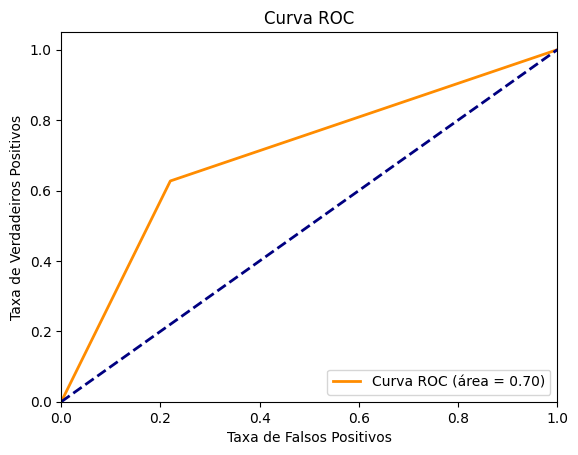



Melhores parâmetros:
--------------------
kernel: poly
degree: 3
C: 1




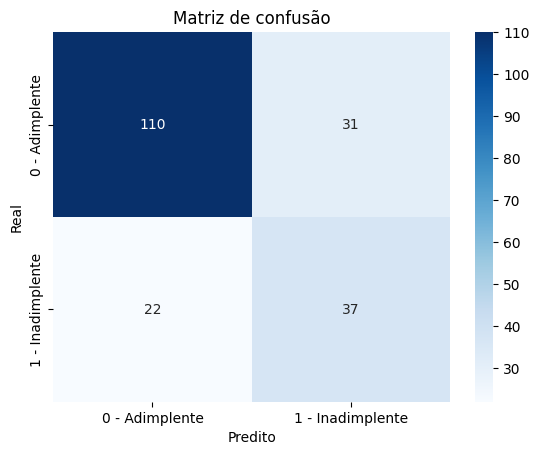

In [77]:
show_results(y_test, y_pred, best_params)

### Gaussian Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
def train_naive_bayes_gaussian(X_train, y_train):
  model = GaussianNB()
  model.fit(X_train, y_train)
  return model

In [66]:
best_model = train_naive_bayes_gaussian(X_train_resample, y_train_resample)

In [69]:
models.append({
  'name': 'Gaussian Naive Bayes',
  'model': best_model,
})

In [70]:
y_pred_teste = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.61      0.72       141
           1       0.47      0.81      0.59        59

    accuracy                           0.67       200
   macro avg       0.68      0.71      0.66       200
weighted avg       0.76      0.67      0.68       200





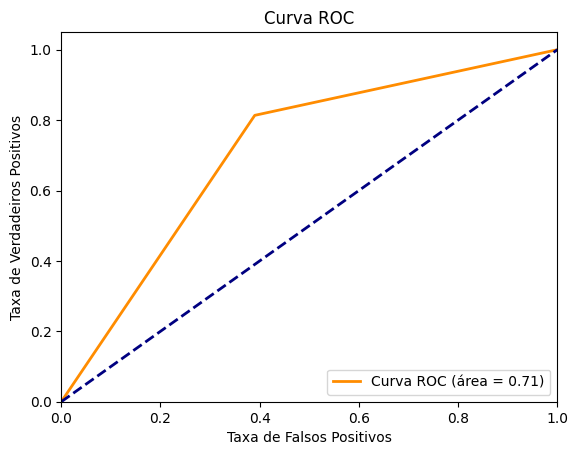

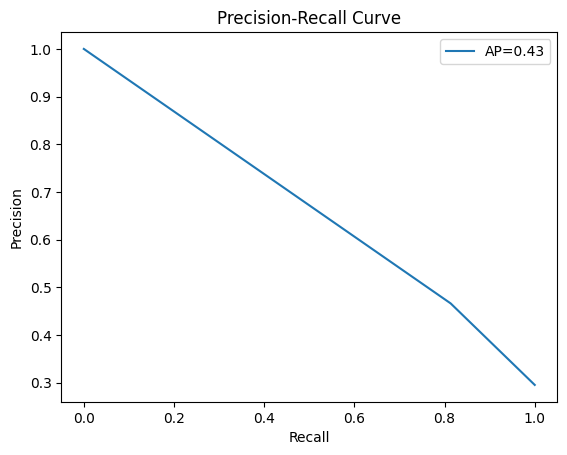

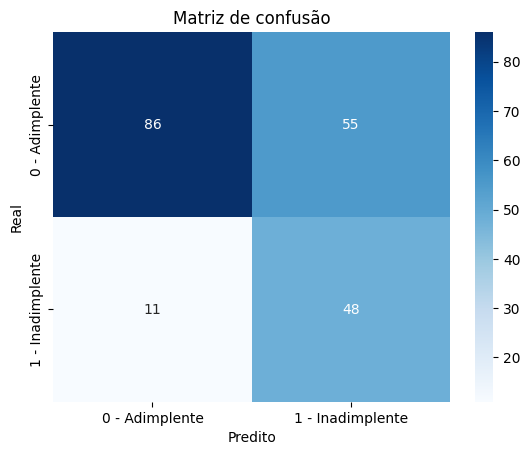

In [71]:
show_results(y_test, y_pred_teste, {})

### Árvore de decisão

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
def train_decision_tree(X_train, y_train):
  model = DecisionTreeClassifier(class_weight = 'balanced')

  param_distributions = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
  }

  random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    refit = 'recall',
    scoring = ['recall', 'roc_auc']
  )

  random_search.fit(X_train, y_train)
  return random_search.best_estimator_, random_search.best_params_

In [86]:
best_model, best_params = train_decision_tree(X_train_resample, y_train_resample)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [87]:
models.append({
  'name': 'Decision Tree',
  'model': best_model,
  'params' : best_params
})

In [88]:
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       141
           1       0.43      0.51      0.47        59

    accuracy                           0.66       200
   macro avg       0.60      0.61      0.61       200
weighted avg       0.67      0.66      0.66       200





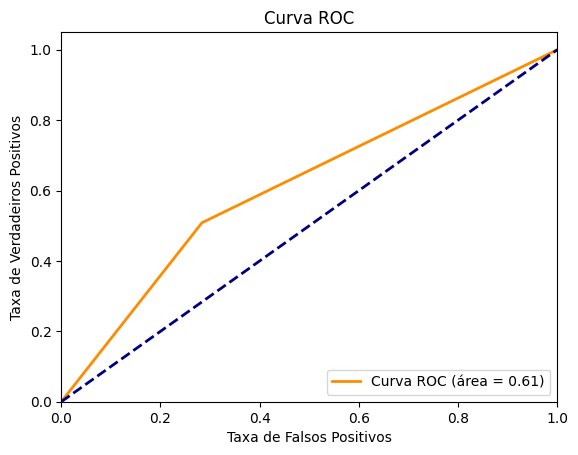



Melhores parâmetros:
--------------------
splitter: random
max_depth: None
criterion: gini




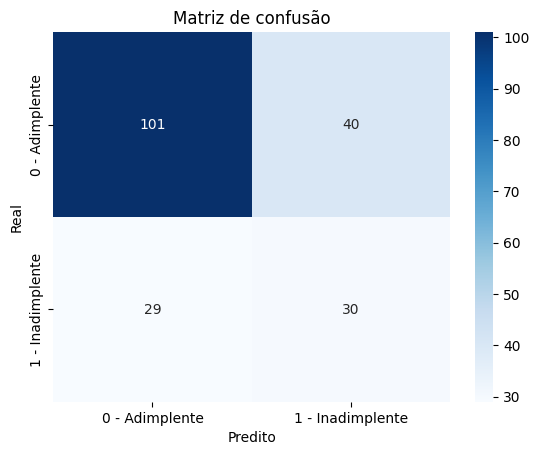

In [89]:
show_results(y_test, y_pred, best_params)

### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
def train_random_forest(X_train, y_train):
  model = RandomForestClassifier(class_weight = 'balanced')

  param_distributions = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20],
    'n_estimators': [100, 200, 300, 400, 500]
  }

  random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    refit = 'recall',
    scoring = ['recall', 'roc_auc']
  )

  random_search.fit(X_train, y_train)
  return random_search.best_estimator_, random_search.best_params_

In [92]:
best_model, best_params = train_random_forest(X_train_resample, y_train_resample)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [93]:
models.append({
  'name': 'Random Forest',
  'model': best_model,
  'params' : best_params
})

In [94]:
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       141
           1       0.67      0.59      0.63        59

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.79      0.80      0.79       200





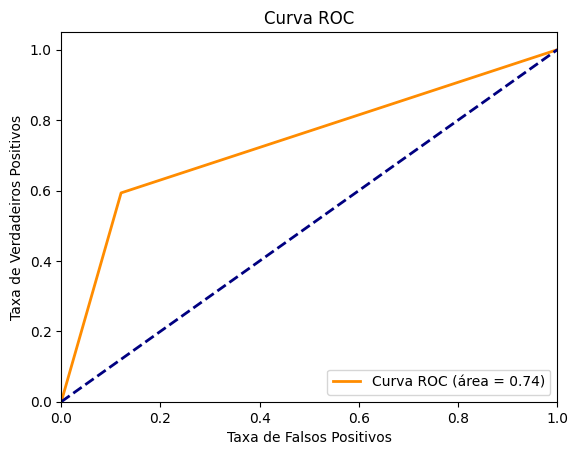



Melhores parâmetros:
--------------------
n_estimators: 200
max_depth: 10
criterion: gini




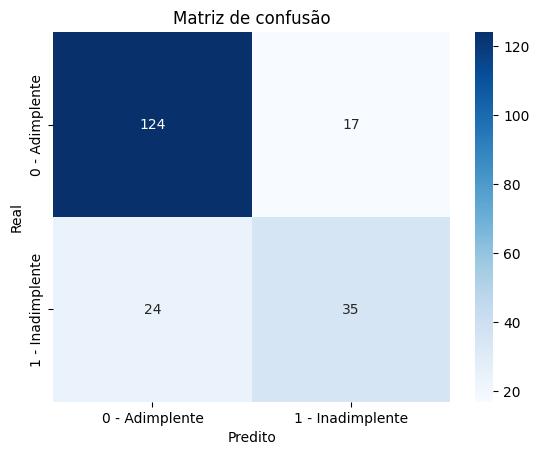

In [95]:
show_results(y_test, y_pred, best_params)

### XGBoost

In [100]:
import xgboost as xgb

In [101]:
def format_df_columns(df):
  df.columns = df.columns.astype(str).str.replace('[', '_').str.replace(']', '_').str.replace('<', '_').str.replace('>', '_')

In [102]:
X_train_resample_xgboost = X_train_resample.copy()
X_test_xgboost = X_test.copy()

In [103]:
format_df_columns(X_train_resample_xgboost)
format_df_columns(X_test_xgboost)

In [104]:
def train_xg_boost(X_train, y_train):
  scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

  model = xgb.XGBClassifier(
    scale_pos_weight = scale_pos_weight,
    use_label_encoder = False
  )

  param_distributions = {
    'max_depth': range(3, 20, 1),
    'n_estimators': range(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
  }

  random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    refit = 'recall',
    scoring = ['recall', 'roc_auc']
  )

  random_search.fit(X_train, y_train)
  return random_search.best_estimator_, random_search.best_params_

In [105]:
best_model, best_params = train_xg_boost(X_train_resample_xgboost, y_train_resample)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:00:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:00:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:00:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:00:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

In [106]:
models.append({
  'name': 'XGBoost',
  'model': best_model,
  'params' : best_params
})

In [107]:
y_pred = best_model.predict(X_test_xgboost)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       141
           1       0.72      0.56      0.63        59

    accuracy                           0.81       200
   macro avg       0.77      0.73      0.75       200
weighted avg       0.80      0.81      0.80       200





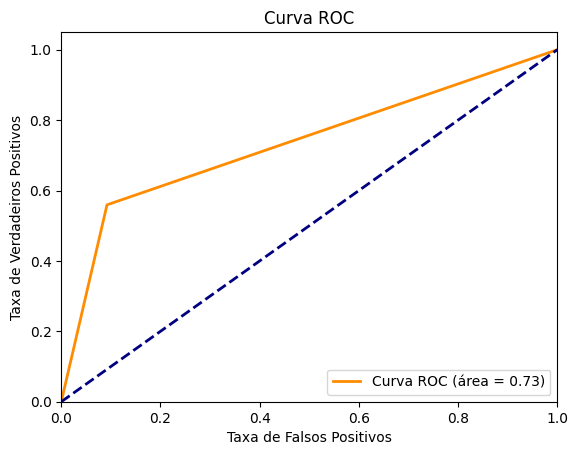



Melhores parâmetros:
--------------------
subsample: 0.5
n_estimators: 600
max_depth: 9
learning_rate: 0.01




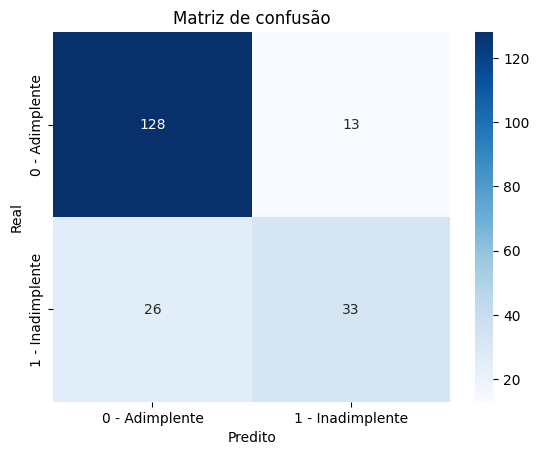

In [108]:
show_results(y_test, y_pred, best_params)

### Perceptron

In [109]:
from sklearn.linear_model import Perceptron

In [110]:
def train_perceptron(X_train, y_train):
  model = Perceptron(class_weight = 'balanced')

  param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': range(0, 2000, 100),
    'tol': [0.0001, 0.001, 0.01, 0.1, 1],
    'shuffle': [True, False],
    'eta0': [0.01, 0.1, 1]
  }

  random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    refit = 'recall',
    scoring = ['recall', 'roc_auc']
  )

  random_search.fit(X_train, y_train)
  return random_search.best_estimator_, random_search.best_params_

In [111]:
best_model, best_params = train_perceptron(X_train_resample, y_train_resample)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  

In [112]:
models.append({
  'name': 'Perceptron',
  'model': best_model,
  'params' : best_params
})

In [113]:
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.29      1.00      0.46        59

    accuracy                           0.29       200
   macro avg       0.15      0.50      0.23       200
weighted avg       0.09      0.29      0.13       200





/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


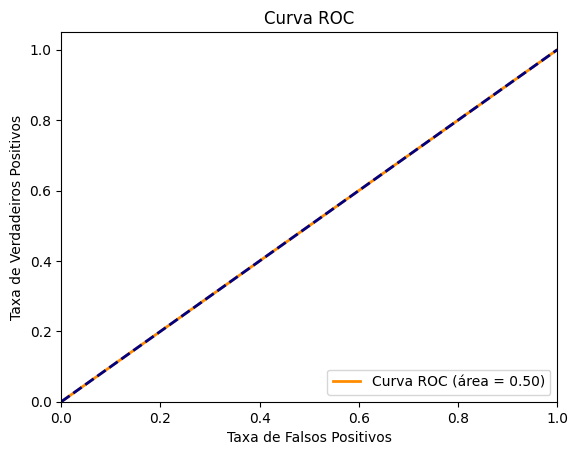



Melhores parâmetros:
--------------------
tol: 0.001
shuffle: False
penalty: elasticnet
max_iter: 1700
eta0: 0.01
alpha: 0.1




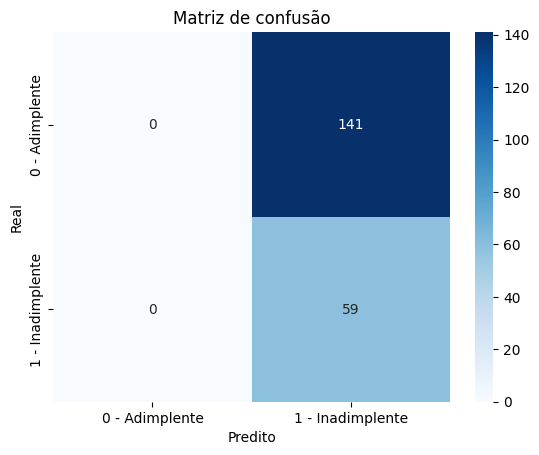

In [114]:
show_results(y_test, y_pred, best_params)

### Rede neural rasa

In [115]:
# pip3 install -q scikeras tensorflow keras scikit-learn

In [116]:
# !pip install -q --upgrade scikeras tensorflow keras scikit-learn

In [117]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier

In [118]:
def create_model(optimizer = 'adam', neurons = 4):
  model = keras.Sequential()
  model.add(layers.Dense(neurons, input_shape=(61,), activation='relu', kernel_initializer="he_normal"))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['recall'])
  return model

In [122]:
def train_shallow_neural_network(X_train, y_train):
  model = KerasClassifier(model = create_model, verbose=0)

  param_distributions = {
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__neurons': [16, 32, 64],
    'epochs': [200, 500, 1000],
    'batch_size': [16, 32, 64]
  }

  random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    refit = 'recall',
    scoring = ['recall', 'roc_auc']
  )

  random_search.fit(X_train, y_train)
  return random_search.best_estimator_, random_search.best_params_

In [123]:
best_model, best_params = train_shallow_neural_network(X_train_resample, y_train_resample)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/k

In [124]:
models.append({
  'name': 'Shallow Neural Network',
  'model': best_model,
  'params' : best_params
})

In [125]:
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       141
           1       0.56      0.59      0.58        59

    accuracy                           0.74       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.75      0.74      0.75       200





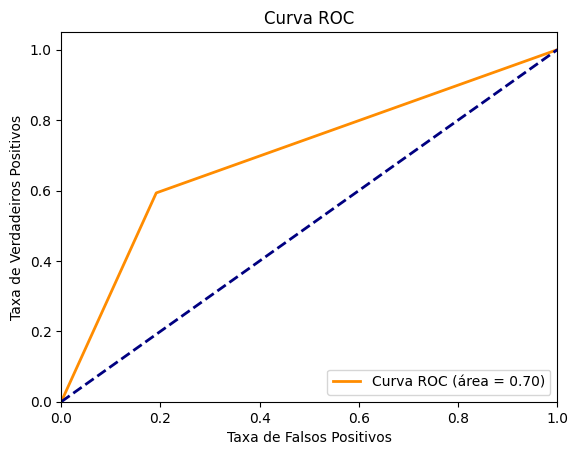



Melhores parâmetros:
--------------------
model__optimizer: adam
model__neurons: 32
epochs: 1000
batch_size: 32




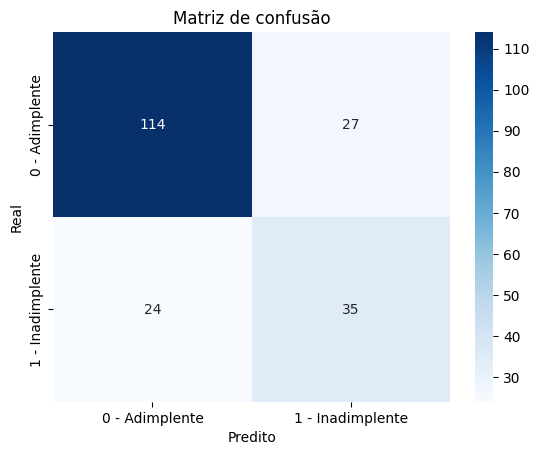

In [126]:
show_results(y_test, y_pred, best_params)

### Rede Neural Profunda

In [127]:
def create_model(optimizer = 'adam', neurons = [64, 32, 16]):
  model = keras.Sequential()
  model.add(layers.Dense(neurons[0], input_shape=(61,), activation='relu', kernel_initializer="he_normal"))
  model.add(layers.Dense(neurons[1], activation='relu', kernel_initializer="he_normal"))
  model.add(layers.Dense(neurons[2], activation='relu', kernel_initializer="he_normal"))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['recall'])
  return model

In [128]:
def train_deep_neural_network(X_train, y_train):
  model = KerasClassifier(model = create_model, verbose=0)

  param_distributions = {
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__neurons': [
        [64, 32, 16],
        [32, 32, 32],
        [32, 16, 8]
    ],
    'epochs': [200, 500, 1000],
    'batch_size': [16, 32, 64]
  }

  random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    refit = 'recall',
    scoring = ['recall', 'roc_auc']
  )

  random_search.fit(X_train, y_train)
  return random_search.best_estimator_, random_search.best_params_

In [129]:
best_model, best_params = train_deep_neural_network(X_train_resample, y_train_resample)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/danielbraz/tcc-usp/lib/python3.12/site-packages/k

In [130]:
models.append({
  'name': 'Deep Neural Network',
  'model': best_model,
  'params' : best_params
})

In [131]:
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       141
           1       0.47      0.44      0.46        59

    accuracy                           0.69       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.68      0.69      0.69       200





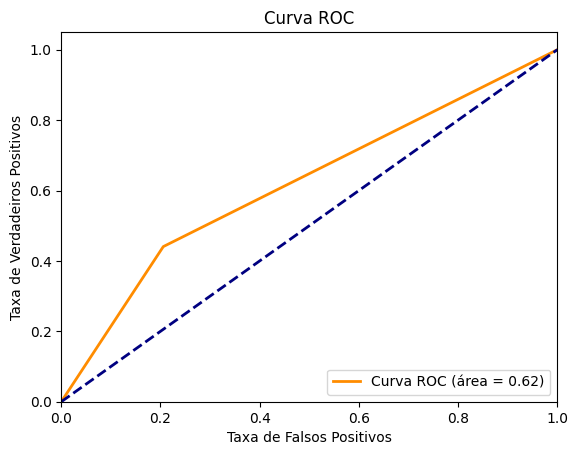



Melhores parâmetros:
--------------------
model__optimizer: adam
model__neurons: [32, 16, 8]
epochs: 500
batch_size: 32




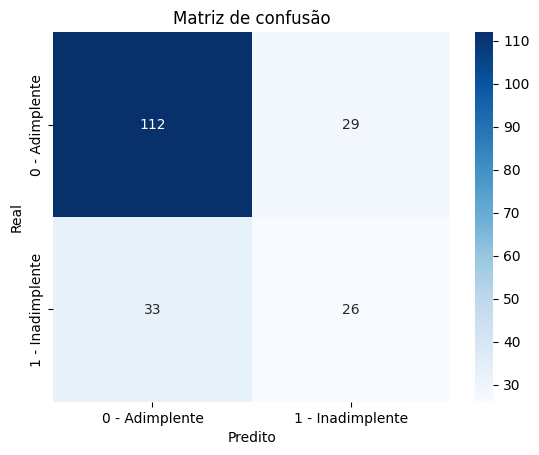

In [132]:
show_results(y_test, y_pred, best_params)

### Plotando resultados agregados

In [195]:
y_preds = {}

for model in models:
  if model['name'] == 'XGBoost':
    y_pred = model['model'].predict(X_test_xgboost)
    y_preds[model['name']] = y_pred
  else:
    y_pred = model['model'].predict(X_test)
    y_preds[model['name']] = y_pred

In [196]:
y_preds

{'Logistic Regression': array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0]),
 'K Nearest Neighbors': array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 

In [228]:
def plot_roc_curves(y_test, y_preds):
  rocs = []

  for model_name, y_pred in y_preds.items():
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    rocs.append({
      'label': f'{model_name} - AUC: %0.2f' % roc_auc,
      'fpr': fpr,
      'tpr': tpr,
    })

  plt.figure(figsize=(10, 6))

  for roc in rocs:
    plt.plot(roc['fpr'], roc['tpr'], lw=2, label=roc['label'])

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Taxa de Falsos Positivos')
  plt.ylabel('Taxa de Verdadeiros Positivos')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")
  plt.savefig('roc.png', format='png')
  plt.show()

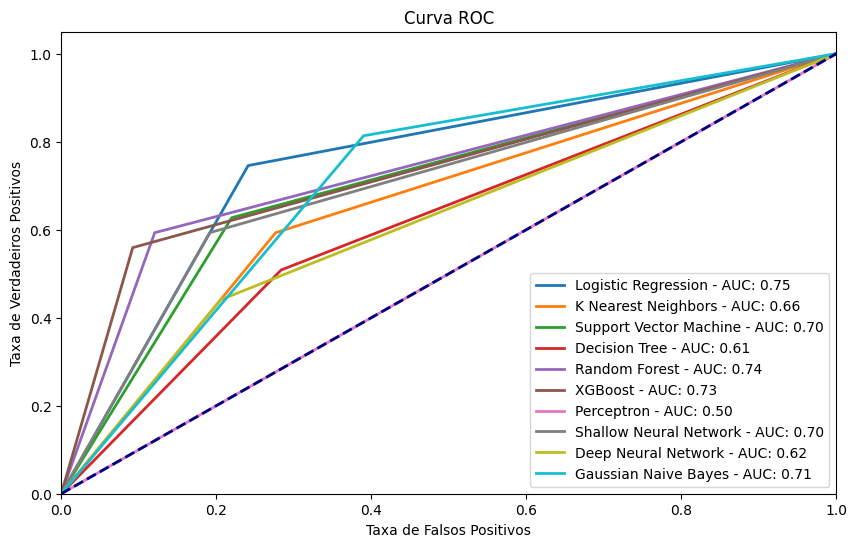

In [229]:
plot_roc_curves(y_test, y_preds)

In [224]:
def plot_prc_curves(y_test, y_preds):
  prcs = []

  for model_name, y_pred in y_preds.items():
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    prcs.append({
      'label': f'{model_name} - AUC: %0.2f' % average_precision,
      'recall': recall,
      'precision': precision,
    })

  plt.figure(figsize=(10, 6))

  for prc in prcs:
    plt.plot(prc['recall'], prc['precision'], label=prc['label'])
      
  plt.xlabel('Revocação')
  plt.ylabel('Precisão')
  plt.title('Precision-Recall Curves')
  plt.legend(loc='best')
  plt.savefig('prc.png', format='png')
  plt.show()

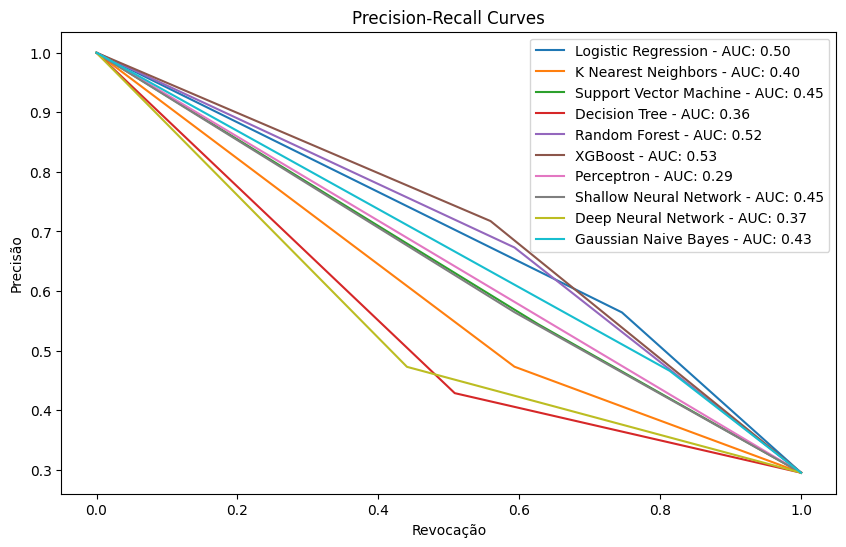

In [225]:
plot_prc_curves(y_test, y_preds)